# MATH 210 Project 2: Women in Canadian Federal Politics

## April 8, 2016

The [Cabinet](http://www.parl.gc.ca/parliamentarians/en/ministries) in the current Canadian Parliament is the first Cabinet in Canadian history to be composed of an equal number of men and women. However, women are still underrepresented in Parliament. In 2016, only 26% of the House of Commons is represented by women (see the [Parliament of Canada](http://www.lop.parl.gc.ca/parlinfo/Lists/Occupation.aspx?Menu=PARL-HOC&Section=03d93c58-f843-49b3-9653-84275c23f3fb&Parliament=b67c82bf-0106-42e5-9be1-46ecb5feaf60&Name=&Party=&Province=&Gender=F&CurrentParliamentarian=False&Occupation=&OccupationType=)).

We will study the number of [Women in Canadian Federal Politics](https://en.wikipedia.org/wiki/Women_in_Canadian_politics) using the [History of the Federal Electoral Ridings, 1867-2010](http://open.canada.ca/data/en/dataset/ea8f2c37-90b6-4fee-857e-984d3060184e) dataset from the Government of Canada's [Open Data Portal](http://open.canada.ca/). We will supplement this dataset with data from the [Parliament of Canada](http://www.lop.parl.gc.ca/Parlinfo/pages/parliament.aspx?Menu=Parliament) regarding the two most recent Parliaments elected in 2011 and 2015.

Although the Parliament of Canada consists of the Governor General, the Senate and the House of Commons, **the entire analysis below concerns only the elected members of Parliament in the House of Commons.**

The questions we address are:

1. Who was the first woman elected to the House of Commons?
2. How many women (in total and as a percentage) were elected to the House of Commons in each Parliament?
3. What is the current trend? Is the number of women elected increasing and at what rate?
4. When will the House of Commons achieve gender balance?

### Executive Summary

1. In 1921, Agnes Macphail was the first woman elected to the House of Commons.
2. It was not for another 50 years that number of elected women started to increase: Grace Macinnis was still the only woman elected in 1968. The percentage of the House of Commons represented by women exceeded 10% for the first time in 1984 and the maximum was 26% in the 42nd Parliament elected in 2015.
3. The percentage of the House of Commons represented by women increased by +0.58%/year from 1968-2015.
4. At this rate, **it will take approximately 41 years to achieve gender balance in the House of Commons (in the year 2056).** There is a need to promote the success of women in Canadian Federal Politics to achieve gender balance much sooner than this projection.

### Table of Contents

1. Introducing the data
2. Women in the House of Commons
    * The first woman elected to the House of Commons
    * The number of women elected to the House of Commons 1921-2015
    * Measuring the increasing rate of women in the House of Commons 1968-2015
    * Projecting gender balance in the House of Commons

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)

## 1. Introducing the data

The [History of the Federal Electoral Ridings, 1867-2010](http://open.canada.ca/data/en/dataset/ea8f2c37-90b6-4fee-857e-984d3060184e) dataset (available from the Government of Canada's [Open Data Portal](http://open.canada.ca/)) is a summary of every candidate who has run for a seat in the Canadian House of Commons during the period 1867 to 2010. The two most recent parliaments are not included and we will append this data later on. There are some names in the dataset containing french accent characters and so we need to specify the encoding option as `latin` for the function `pandas.read_csv` to import the file properly.

In [2]:
candidates = pd.read_csv('elections.csv',encoding='latin')

In [3]:
candidates.head()

,Election Date,Election Type,Parliament,Province,Riding,Last Name,First Name,Gender,Occupation,Party,Votes,Votes (%),Elected
0,1867-08-07,Gen,1,New Brunswick,ALBERT,WALLACE,John,NaN,farmer,Liberal,778,52.14,1
1,1867-08-07,Gen,1,New Brunswick,ALBERT,STEVENS,Henry J.,NaN,NaN,Unknown,714,47.86,0
2,1867-08-07,Gen,1,New Brunswick,CARLETON,CONNELL,Hon. Charles,NaN,general merchant,Liberal,accl.,NaN,1
3,1867-08-07,Gen,1,New Brunswick,CHARLOTTE,BOLTON,John,NaN,businessman,Liberal,1214,56.94,1
4,1867-08-07,Gen,1,New Brunswick,CHARLOTTE,THOMPSON,Robert,NaN,NaN,Unknown,918,43.06,0


In [4]:
candidates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38777 entries, 0 to 38776
Data columns (total 13 columns):
Election Date    38777 non-null object
Election Type    38777 non-null object
Parliament       38777 non-null int64
Province         38777 non-null object
Riding           38777 non-null object
Last Name        38777 non-null object
First Name       38545 non-null object
Gender           5443 non-null object
Occupation       36469 non-null object
Party            38777 non-null object
Votes            38742 non-null object
Votes (%)        38119 non-null float64
Elected          38777 non-null int64
dtypes: float64(1), int64(2), object(10)
memory usage: 3.8+ MB


We see that there are 38,777 lines of data and 13 columns. Each row is a candidate who ran in a Canadian federal election. The columns are as follows (see the [explanation](http://open.canada.ca/commonwebsol/fileuploads/4/4/F/44FAA61D-BF17-4C87-B9B7-70F9F21AE495/HFERDatasetDefinitions.txt) accompanying the data file):

* **Election Date**: the entries of this column are strings containing the year-month-day of the election. We will separate the year, month and day into their own columns later
* **Election Type**: Gen = General Federal Election, B/P = By-election (an election to fill a single seat that was vacated between general elections)
* **Parliament**: The number of the [Parliament](http://www.parl.gc.ca/default.aspx?Language=E) (the most recently elected is the 42nd Parliament)
* **Province**: Province of the riding
* **Riding**: Name of the region represented by the member of Parliament
* **Last Name**: Last name of the candidate
* **First Name**: First name of the candidate
* **Gender**: Gender of the candidate (M or no data = Male, F = Female)
* **Occupation**: Occupation of the candidate
* **Party**: Party affiliation of the candidate
* **Votes**: Number of votes for the candidate (accl. = Candidate was acclaimed)
* **Votes (%)**: Percentage of votes for the candidate
* **Elected**: 1 = Elected, 0 = Not elected

### Get the year of each Parliament as an integer

We can separate the year of the election into its own column for our convenience.

In [5]:
candidates['Election Year'] = candidates['Election Date'].map(lambda x: int(x[0:4]))

In [6]:
candidates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38777 entries, 0 to 38776
Data columns (total 14 columns):
Election Date    38777 non-null object
Election Type    38777 non-null object
Parliament       38777 non-null int64
Province         38777 non-null object
Riding           38777 non-null object
Last Name        38777 non-null object
First Name       38545 non-null object
Gender           5443 non-null object
Occupation       36469 non-null object
Party            38777 non-null object
Votes            38742 non-null object
Votes (%)        38119 non-null float64
Elected          38777 non-null int64
Election Year    38777 non-null int64
dtypes: float64(1), int64(3), object(10)
memory usage: 4.1+ MB


In [7]:
candidates.tail()

,Election Date,Election Type,Parliament,Province,Riding,Last Name,First Name,Gender,Occupation,Party,Votes,Votes (%),Elected,Election Year
38772,2010/11/29,B/P,40,Ontario,VAUGHAN,Rodriguez-Larrain,Claudia,F,ceo,Green Party of Canada,481,1.22,0,2010
38773,2010/11/29,B/P,40,Ontario,VAUGHAN,Fabrizio,Paolo,NaN,baker,Libertarian Party of Canada,251,0.64,0,2010
38774,2010/11/29,B/P,40,Ontario,VAUGHAN,Bory,Leslie,M,unemployed,Independent,111,0.28,0,2010
38775,2010/11/29,B/P,40,Ontario,VAUGHAN,Baxter,Dorian,NaN,anglican priest,Progressive Conservative,110,0.28,0,2010
38776,2010/11/29,B/P,40,Ontario,VAUGHAN,Jedan,Brian,M,national sales representative,United Party of Canada,55,0.14,0,2010


### Fill in missing data in Gender column

The [table of definitions](http://open.canada.ca/commonwebsol/fileuploads/4/4/F/44FAA61D-BF17-4C87-B9B7-70F9F21AE495/HFERDatasetDefinitions.txt) accompanying the data explains that missing data in the Gender column implies the candidate was male therefore we can fill the missing values with M.

In [8]:
candidates['Gender'].fillna('M',inplace=True)
candidates.head()

,Election Date,Election Type,Parliament,Province,Riding,Last Name,First Name,Gender,Occupation,Party,Votes,Votes (%),Elected,Election Year
0,1867-08-07,Gen,1,New Brunswick,ALBERT,WALLACE,John,M,farmer,Liberal,778,52.14,1,1867
1,1867-08-07,Gen,1,New Brunswick,ALBERT,STEVENS,Henry J.,M,NaN,Unknown,714,47.86,0,1867
2,1867-08-07,Gen,1,New Brunswick,CARLETON,CONNELL,Hon. Charles,M,general merchant,Liberal,accl.,NaN,1,1867
3,1867-08-07,Gen,1,New Brunswick,CHARLOTTE,BOLTON,John,M,businessman,Liberal,1214,56.94,1,1867
4,1867-08-07,Gen,1,New Brunswick,CHARLOTTE,THOMPSON,Robert,M,NaN,Unknown,918,43.06,0,1867


## 2. Women in the House of Commons

Let's begin by selecting the rows corresponding to women who were elected to the House of Commons:

In [9]:
elected_women = candidates[(candidates['Gender'] == 'F') & (candidates['Elected'] == 1)]

### 2.1 The first woman elected to the House of Commons

In [10]:
elected_women.head(7)

,Election Date,Election Type,Parliament,Province,Riding,Last Name,First Name,Gender,Occupation,Party,Votes,Votes (%),Elected,Election Year
6715,1921/12/06,Gen,14,Ontario,GREY SOUTHEAST,MACPHAIL,Agnes Campbell,F,schoolteacher and farmer,Progressive,6958,49.86,1,1921
7388,1925/10/29,Gen,15,Ontario,GREY SOUTHEAST,MACPHAIL,Agnes C.,F,schoolteacher and farmer,Progressive,6652,55.91,1,1925
7956,1926/09/14,Gen,16,Ontario,GREY SOUTHEAST,MACPHAIL,Agnes Campbell,F,schoolteacher and farmer,Progressive,7939,56.11,1,1926
8531,1930/07/28,Gen,17,Ontario,GREY SOUTHEAST,MACPHAIL,Agnes Campbell,F,schoolteacher and farmer,Progressive,6619,50.93,1,1930
9289,1935/10/14,Gen,18,Ontario,GREY--BRUCE,MACPHAIL,Agnes C.,F,schoolteacher,United Farmers of Ontario-Labour,7210,39.97,1,1935
9821,1935/10/14,Gen,18,Yukon,YUKON,BLACK,Martha Louise,F,married woman,Independent Conservative,696,55.64,1,1935
10515,1940/03/26,Gen,19,Saskatchewan,NORTH BATTLEFORD,NIELSEN,Dorise W.,F,housewife,Unity,10500,57.16,1,1940


The first woman elected to Canadian parliament was [Agnes Campbell Macphail](https://en.wikipedia.org/wiki/Agnes_Macphail), a teacher and journalist from Ontario:

![Agnes Macphail](http://www.saugeentimes.com/87%20x/Women%20Today%20CFUW%20presents%20a%20celebration%20of%20Agnes%20Macphail%20Sept%2028%202015/Macphail.jpg)

She is well-known for her work on progressive issues such as her work towards penal reform:

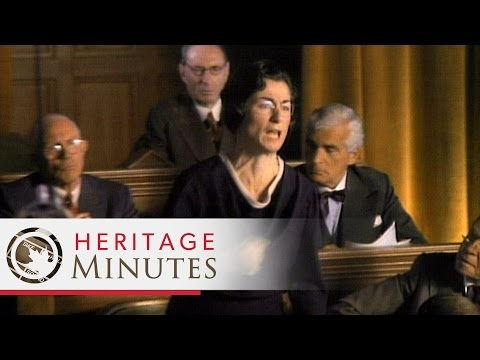

In [11]:
from IPython.display import YouTubeVideo
YouTubeVideo("0ALgilFMkug")

In fact, Agnes Macphail was the **only woman** elected to Parliament in 1921, 1925, 1926, and 1930. Finally, in 1935, Martha Black and Agnes Macphail were both elected to Parliament; the first time multiple women were elected to the House of Commons.

### 2.2 The number of women elected to the House of Commons 1921-2015

We can count the number of women elected to the House of Commons since Agnes Macphail was the first to be elected in 1921. We can append the number of women elected in the two most recent federal elections in 2011 and 2015 (not included in our dataset). These numbers can be found on the [Parliament of Canada's webpage](http://www.lop.parl.gc.ca/parlinfo/Lists/Occupation.aspx?Menu=PARL-HOC&Section=03d93c58-f843-49b3-9653-84275c23f3fb&Parliament=b67c82bf-0106-42e5-9be1-46ecb5feaf60&Name=&Party=&Province=&Gender=F&CurrentParliamentarian=False&Occupation=&OccupationType=).

#### Total number of women elected to the House of Commons

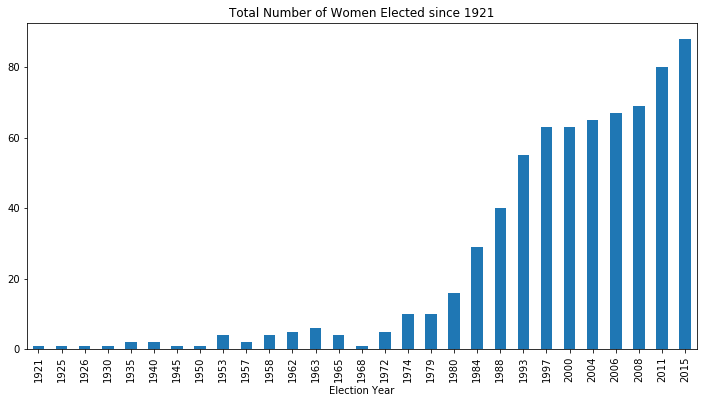

In [12]:
total_elected_women = elected_women.groupby('Parliament').size()
total_elected_women.index = elected_women.groupby('Parliament')['Election Year'].min()
total_elected_women.name = 'Elected Women'
total_elected_women[2011] = 80
total_elected_women[2015] = 88

total_elected_women.plot(kind='bar',title='Total Number of Women Elected since 1921')

Although there have been more women elected to parliament in recent years, there was still only one woman elected to to the 28th Parliament:

In [13]:
elected_women[elected_women['Parliament'] == 28]

,Election Date,Election Type,Parliament,Province,Riding,Last Name,First Name,Gender,Occupation,Party,Votes,Votes (%),Elected,Election Year
18511,1968/06/25,Gen,28,British Columbia,VANCOUVER KINGSWAY,MACINNIS,Grace,F,writer,New Democratic Party,15599,49.55,1,1968


[Grace Macinnis](http://www.lop.parl.gc.ca/ParlInfo/Files/Parliamentarian.aspx?Item=ADDA36BC-8669-4E53-B76D-1081337EC422&Language=E&Section=ALL) was the only woman elected to Parliament in 1968 and represented Vancouver-Kingsway.

#### Percentage of the House of Commons represented by women

We can also measure the percentage of the House of Commons represented by women simply by dividing the values calculated above by the total number of persons elected. Again, we refer to the Parliament of Canada's webpage to fill in the values for the two most recent elections.

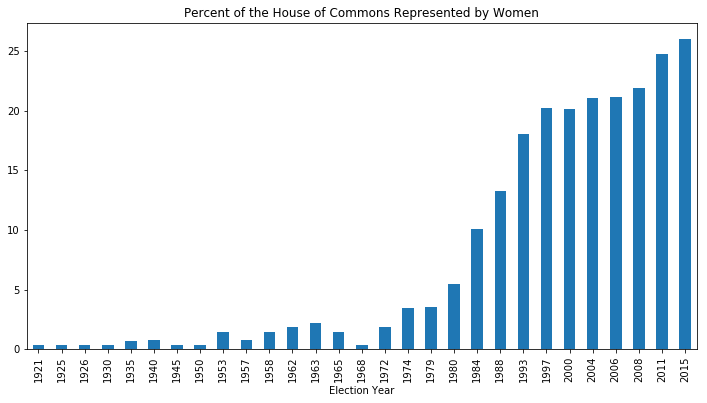

In [14]:
elected = candidates[(candidates['Parliament'] > 13) & (candidates['Elected'] == 1)]
percentage_women = elected_women.groupby('Parliament').size() / elected.groupby('Parliament').size()
percentage_women.index = elected_women.groupby('Parliament')['Election Year'].min()
percentage_women[2011] = 80/323
percentage_women[2015] = 88/338
percentage_women = percentage_women*100

percentage_women.columns = ['Elected Women (%)','Year']
percentage_women.plot(kind='bar',title='Percent of the House of Commons Represented by Women',x='Year')

The [33rd Parliament](http://www.lop.parl.gc.ca/ParlInfo/Files/Parliament.aspx?Item=4ae94798-0b56-4f9c-b48e-d2fb6c7aede6&Language=E&MenuID=Lists.Parliament.aspx&MenuQuery=http%3A%2F%2Fwww.lop.parl.gc.ca%2FParlInfo%2FLists%2FParliament.aspx) elected in 1984 was the first House of Commons composed of at least 10% women and the percentage of women has increased to 26% in the 42nd Parliament elected in 2015.

### 2.3 Measuring the increasing rate of women in the House of Commons 1968-2015

The number of women elected to Parliament only started to increase after 1968. We will perform a linear regression analysis to calculate the rate at which the percentage of the House of Commons represented by women from 1968 to 2015 is increasing.

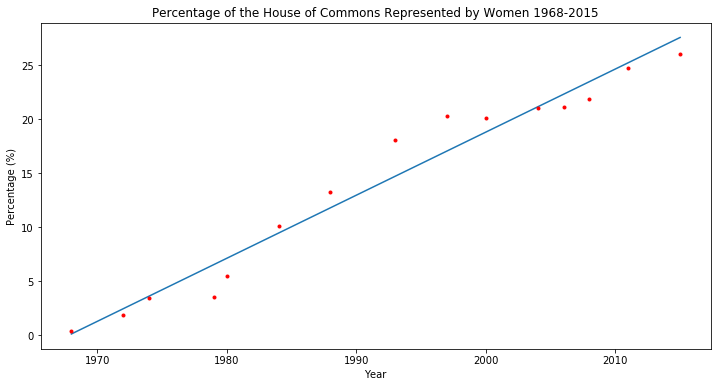

In [15]:
X = np.array([np.ones(15), percentage_women.loc[1968:].index.values])
X = np.matrix(X).T
Y = percentage_women.loc[1968:].values
Y = np.matrix(Y).T

A = (X.T * X)**(-1) * X.T * Y

x = percentage_women.loc[1968:].index.values
y = A[0,0] + A[1,0]*x
plt.plot(x,y,X[:,1],Y,'r.')
plt.xlabel('Year'), plt.ylabel('Percentage (%)')
plt.title('Percentage of the House of Commons Represented by Women 1968-2015')
plt.show()

The percentage of the House of Commons represented by women is increasing at the rate 0.58%/year.

In [16]:
incr_women_per_year = A[1,0]
incr_women_per_year

0.58396889916151373

### 2.4 Projecting Gender Balance in the House of Commons

We have calculated the rate at which the percentage of the House of Commons represented by women is increasing and so the final step is to use this rate to predict when the House will achieve gender balance. We calculate:

( Women in the House of Commons in 2015, % ) + ( Increase of Women in the House of Commons, %/year ) * ( Number of Years ) = 50%

$\Rightarrow$ Number of Years = ( 50% - ( Women in the House of Commons in 2015, % ) ) / ( Increase of Women in the House of Commons, %/year )

In [17]:
(50 - percentage_women[2015]) / incr_women_per_year

41.037283108448612

At the current rate, the House of Commons in the Parliament of Canada will achieve gender balance in 41 years (in 2056).